# package_LAB

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
import package_LAB
from package_LAB import LL_RT


In [97]:
# LEADLAG_RT()

(0.0, 100.0)

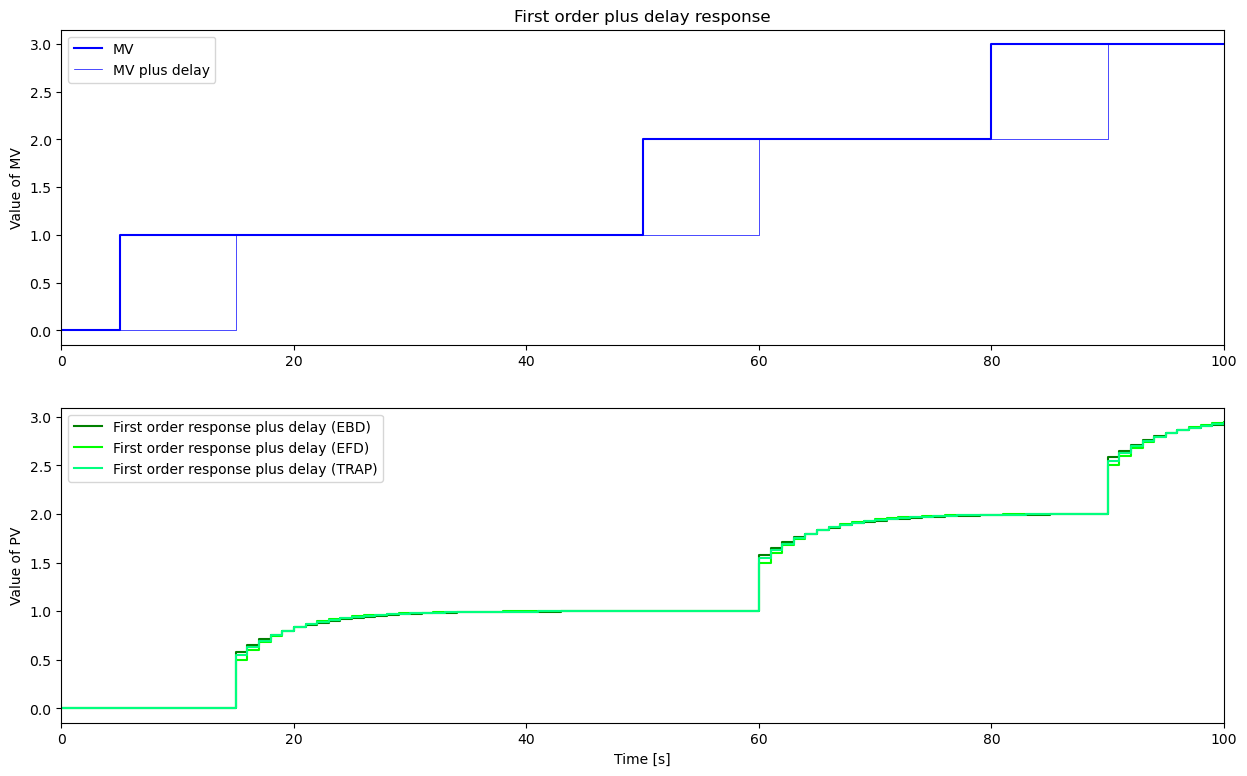

In [98]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 5
Tlag = 2
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay, Kp, TLead, TLag, Ts, PV_EBD)
    LL_RT(MVDelay, Kp, TLead, TLag, Ts, PV_EFD, 0, 'EFD')
    LL_RT(MVDelay, Kp, TLead, TLag, Ts, PV_TRAP, 0, 'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

In [99]:
# PID()

In [101]:
def PID_RT(SP, PV, Man, MVMan, MVFF, KC, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD'):
    """
    The function "PID_RT" needs to be included in a "for or while loop".
    SP: (or SetPoint) vector
    PV: (or Process Value) vector
    Man: (or Manual controller mode) vector (True or False)
    MVMan:(or Manual value for MV) vector
    MVFF: (or Feedforward) vector
    KC: controller gain
    Ti: integral time constant [s]
    Td: derivative time constant [s]
    alpha: TFD = alpha*Td where TFD is the derivative filter time constant [s]
    Ts: sampling period [s]
    MVMin: minimum value for MV (used for saturation and anti wind-up) :MVMax: maximum value for MV (used for saturation and anti wind-up)
    MV: MV (or Manipulated Value) vector
    MVP: MVP (or Propotional part of MV) vector
    MVI: MVI (or Integral part of MV) vector
    MVD: MVD (or Derivative part of MV) vector
    E: E (or control Error) vector
    ManFF: Activated FF in manual mode (optional: default boolean value is False)
    PVInit: Init value for PV (optional: default value is 0): used if PID_RT is ran first in the squence and no value of PV available yet.
    method: discretisation method (optional: default value is 'EBD')
    EBD-EBD: EBD for integral action and EBD for derivative action 
    EBD-TRAP: EBD for integral action and TRAP for derivative action 
    TRAP-EBD: TRAP for integral action and EBD for derivative action 
    TRAP-TRAP: TRAP for integral action and TRAP for derivative action
    The function "PID_RT" appends new values to the vectors "MV", "MVP", "MVI", and "MVD".
    The appended values are based on the PID algorithm, the controller mode, and feedforward.
    Note that saturation of "MV" within the limits [MVMin MVMax] is implemented with anti wind-up.
"""

## Pseudo code

#Initialiwation
TFD = Td * alpha
#Erreur
    if len(PV) ==0 :
        print("E = ", E, "  \len(E) = ", len(E), "Rest = ", SP[-1] - PVInit)
        E.append(SP[-1] - PVInit)
    else:
        E.append(SP[-1] - PV[-1])


#computation of MVP ( proportional action)
if len(MVP)==0 :
    MVP.append((KC*E[-1]))
else:
    if method == 'EBD':
        MVP.append(KC*E[-1])
       elif method == 'TRAP':  
            MVP.append(KC*E[-1])        
        else: 
            MVP.append(KC*E[-1])

#computation of MVI (integral action)
if len(MVI) == 0:
    MVI.append((Kc*Ts/Ti)*(E[-1]+E[-2])) # intialisation with EBD
else:
    if method == 'TRAP':
          MVI.append(MVI[-1] + (0.5*KC*Ts/Ti)*(E[-1] + E[-2]))
    else:      #default :EBD
            MVI.append(MVI[-1] + (KC*Ts/Ti)*E[-1])

    
#computation of MVD (derivate action)
if len(MVD)==0:
    MVD.append(((KC*Td)/(TFD+Ts))*(E[-1]))
else:
    if method == 'EBD':
        MVD.append((TFD/(TFD+Ts))*MVD[-1] + ((KC*Td)/(TFD+Ts))*(E[-1] - E[-2])) 
    else method =='TRAP':
        MVD.append((((TFD-(Ts/2))/(TFD+(Ts/2)))*MVD[-1] + ((KC*Td)/(TFD+(Ts/2)))*(E[-1] - E[-2])))     

# 



IndentationError: unindent does not match any outer indentation level (<string>, line 50)